In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [2]:
df = pd.read_parquet("../data/combined_data.parquet")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29148075 entries, 0 to 29148074
Data columns (total 4 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   MeasureDate      object
 1   MeasurementName  object
 2   Value            object
 3   Status           object
dtypes: object(4)
memory usage: 889.5+ MB
None


In [3]:
df.isnull().sum()



MeasureDate        75
MeasurementName     0
Value              75
Status              0
dtype: int64

In [4]:
df = df.dropna()
df.isnull().sum()

MeasureDate        0
MeasurementName    0
Value              0
Status             0
dtype: int64

In [5]:
df.dtypes

MeasureDate        object
MeasurementName    object
Value              object
Status             object
dtype: object

In [6]:
df["MeasureDate"].head(10)


0    01.07.13 00:00
1    01.07.13 00:00
2    01.07.13 00:00
3    01.07.13 00:00
4    01.07.13 00:00
5    01.07.13 00:00
6    01.07.13 00:00
7    01.07.13 00:00
8    01.07.13 00:00
9    01.07.13 00:00
Name: MeasureDate, dtype: object

In [7]:
df["MeasureDate"] = pd.to_datetime(
    df["MeasureDate"], 
    format="%d.%m.%y %H:%M",
    errors="coerce"   
)

df["Value"] = (
    df["Value"]
    .str.replace(",", ".", regex=False)
    .str.extract(r"([-+]?\d*\.?\d+)")[0]
    .astype(float)
)

df["MeasurementName"] = df["MeasurementName"].astype("category")
print(df.dtypes)

print("Total rows:", len(df))
print("Valid MeasureDate:", df["MeasureDate"].notna().sum())
print("Valid Value:", df["Value"].notna().sum())
print("Unique MeasurementName:", df["MeasurementName"].nunique())


MeasureDate        datetime64[ns]
MeasurementName          category
Value                     float64
Status                     object
dtype: object
Total rows: 29148000
Valid MeasureDate: 26302484
Valid Value: 27624402
Unique MeasurementName: 75


In [8]:
# make pivot faster
df  = df.sort_values("MeasureDate")
df = df.set_index("MeasureDate")

In [9]:
pivot_df = df.pivot_table(
    index="MeasureDate",
    columns="MeasurementName",
    values="Value",
    aggfunc="mean",
    observed=True
)
pivot_df.head()


MeasurementName,SSA 3 Lysimeter UMP 120cm %,SSA 3 Lysimeter UMP 30cm %,SSA 3 Lysimeter UMP 75cm %,SSA 3 Lysimeter battery V,SSA 3 Lysimeter ec 120cm mS/cm,SSA 3 Lysimeter ec 30cm mS/cm,SSA 3 Lysimeter ec 75cm mS/cm,SSA 3 Lysimeter scale (1) kg,SSA 3 Lysimeter temperature 120cm degC,SSA 3 Lysimeter temperature 30cm degC,...,Weather Station UMP (1) temperature degC,Weather Station air pressure hPa,Weather Station air temperature degC,Weather Station battery V,Weather Station humidity %,Weather Station precipitation mm,Weather Station radiation W/qm,Weather Station temperature (5+) degC,Weather Station wind direction deg,Weather Station wind speed m/s
MeasureDate,,,,,,,,,,,,,,,,,,,,,
2013-07-01 00:00:00,32.709999,25.17,33.700001,12.72,0.11,0.13,0.14,2845.469971,16.730000,18.430000,...,18.780001,1018.650024,7.62,12.93,89.440002,0.0,-5.49,8.98,7.120000,0.05
2013-07-01 00:14:00,32.730000,25.17,33.689999,12.71,0.11,0.13,0.12,2845.469971,16.709999,18.430000,...,18.780001,1018.659973,7.52,12.88,89.599998,0.0,-5.21,9.11,354.309998,0.08
2013-07-01 00:30:00,32.720001,25.17,33.689999,12.71,0.11,0.13,0.14,2845.469971,16.700001,18.389999,...,18.750000,1018.739990,7.79,12.91,87.290001,0.0,-5.33,9.11,302.880005,0.08
2013-07-01 00:45:00,32.720001,25.17,33.689999,12.70,0.10,0.11,0.12,2845.459961,16.700001,18.389999,...,18.750000,1018.789978,7.22,12.91,91.019997,0.0,-5.83,8.34,176.869995,0.02
2013-07-01 00:59:00,32.619999,25.17,33.689999,12.69,0.10,0.13,0.14,2845.449951,16.700001,18.350000,...,18.730000,1018.820007,7.33,12.90,91.120003,0.0,-5.14,8.10,125.580002,0.03


In [10]:
print(pivot_df.shape)
pivot_df.to_parquet("../data/pivot_data.parquet")


(371882, 75)


<Axes: xlabel='MeasureDate'>

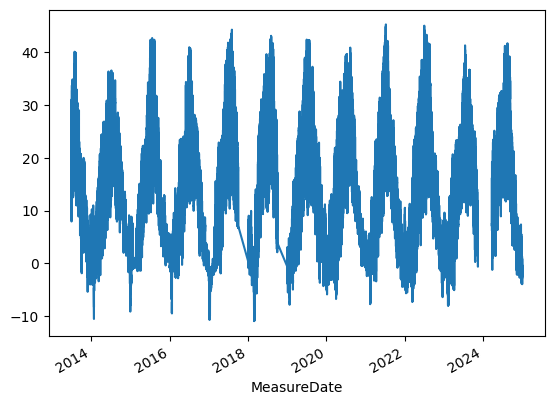

In [11]:
pivot_df.describe()               # summary stats
pivot_df["Weather Station temperature (5+) degC"].plot()    # plot one variable


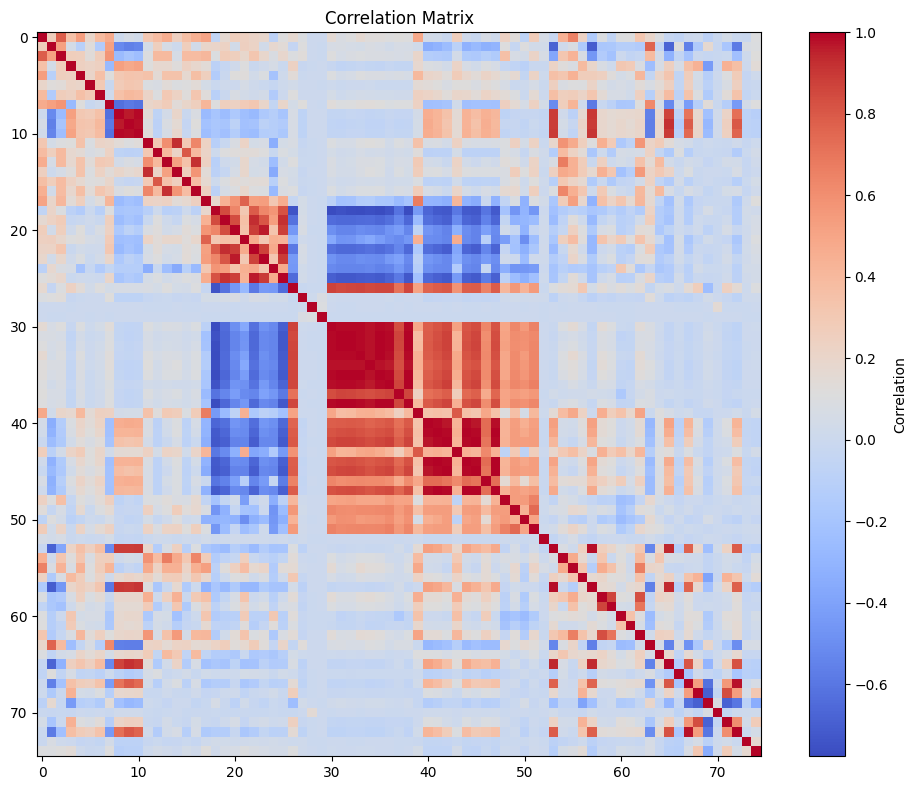

In [12]:
corr = pivot_df.corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation')


plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [13]:
corr

MeasurementName,SSA 3 Lysimeter UMP 120cm %,SSA 3 Lysimeter UMP 30cm %,SSA 3 Lysimeter UMP 75cm %,SSA 3 Lysimeter battery V,SSA 3 Lysimeter ec 120cm mS/cm,SSA 3 Lysimeter ec 30cm mS/cm,SSA 3 Lysimeter ec 75cm mS/cm,SSA 3 Lysimeter scale (1) kg,SSA 3 Lysimeter temperature 120cm degC,SSA 3 Lysimeter temperature 30cm degC,...,Weather Station UMP (1) temperature degC,Weather Station air pressure hPa,Weather Station air temperature degC,Weather Station battery V,Weather Station humidity %,Weather Station precipitation mm,Weather Station radiation W/qm,Weather Station temperature (5+) degC,Weather Station wind direction deg,Weather Station wind speed m/s
MeasurementName,,,,,,,,,,,,,,,,,,,,,
SSA 3 Lysimeter UMP 120cm %,1.000000,0.271282,0.784630,0.351301,0.534723,0.198085,0.383111,0.472544,0.013740,0.059062,...,-0.029002,-0.057039,0.006172,0.013912,-0.084292,-0.009381,0.053201,0.000223,-0.008135,0.098269
SSA 3 Lysimeter UMP 30cm %,0.271282,1.000000,0.514897,0.051908,-0.100381,0.121995,-0.141868,0.526542,-0.516109,-0.559807,...,-0.673942,0.116525,-0.555038,-0.154412,0.167586,-0.023492,-0.183388,-0.580791,0.072494,0.097149
SSA 3 Lysimeter UMP 75cm %,0.784630,0.514897,1.000000,0.259510,0.255342,0.137790,0.271250,0.569931,-0.257455,-0.198834,...,-0.313313,-0.052838,-0.207011,-0.012690,-0.029722,-0.018149,0.000032,-0.222604,0.014551,0.115322
SSA 3 Lysimeter battery V,0.351301,0.051908,0.259510,1.000000,0.241532,0.219491,0.240545,-0.263148,0.521882,0.484195,...,0.249066,0.063785,0.352660,0.437480,-0.434898,-0.025114,0.441423,0.367845,0.003452,0.141049
SSA 3 Lysimeter ec 120cm mS/cm,0.534723,-0.100381,0.255342,0.241532,1.000000,0.207543,0.354617,0.112810,0.304202,0.333357,...,0.323231,-0.056484,0.270515,0.055614,-0.115961,0.003441,0.104492,0.273085,-0.034319,0.017970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Weather Station precipitation mm,-0.009381,-0.023492,-0.018149,-0.025114,0.003441,0.000167,0.004490,-0.010479,0.025106,0.024588,...,0.025416,-0.075634,0.003831,-0.045454,0.083174,1.000000,-0.045739,0.005450,0.012789,0.018413
Weather Station radiation W/qm,0.053201,-0.183388,0.000032,0.441423,0.104492,0.073584,0.139266,-0.118823,0.215710,0.247751,...,0.260699,0.026783,0.558383,0.835780,-0.679730,-0.045739,1.000000,0.609294,0.037689,0.273950
Weather Station temperature (5+) degC,0.000223,-0.580791,-0.222604,0.367845,0.273085,0.245508,0.340539,-0.439972,0.719629,0.803738,...,0.825669,-0.182726,0.976501,0.538396,-0.596895,0.005450,0.609294,1.000000,-0.001228,0.050384


In [14]:
pivot_hourly = pivot_df.resample("H").mean()
pivot_hourly.head()

C:\Users\cunob\AppData\Local\Temp\ipykernel_22628\948317925.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pivot_hourly = pivot_df.resample("H").mean()


MeasurementName,SSA 3 Lysimeter UMP 120cm %,SSA 3 Lysimeter UMP 30cm %,SSA 3 Lysimeter UMP 75cm %,SSA 3 Lysimeter battery V,SSA 3 Lysimeter ec 120cm mS/cm,SSA 3 Lysimeter ec 30cm mS/cm,SSA 3 Lysimeter ec 75cm mS/cm,SSA 3 Lysimeter scale (1) kg,SSA 3 Lysimeter temperature 120cm degC,SSA 3 Lysimeter temperature 30cm degC,...,Weather Station UMP (1) temperature degC,Weather Station air pressure hPa,Weather Station air temperature degC,Weather Station battery V,Weather Station humidity %,Weather Station precipitation mm,Weather Station radiation W/qm,Weather Station temperature (5+) degC,Weather Station wind direction deg,Weather Station wind speed m/s
MeasureDate,,,,,,,,,,,,,,,,,,,,,
2013-07-01 00:00:00,32.700000,25.170000,33.691999,12.706,0.1060,0.1260,0.132,2845.463965,16.708000,18.398000,...,18.758000,1018.731994,7.496000,12.9060,89.694000,0.0,-5.4000,8.728000,193.352000,0.052000
2013-07-01 01:00:00,32.680000,25.160000,33.695000,12.685,0.1100,0.1200,0.130,2845.454956,16.675000,18.320000,...,18.653334,1018.826660,7.093333,12.8700,91.213333,0.0,-5.0700,8.453333,211.603336,0.253333
2013-07-01 02:00:00,32.625000,25.165000,33.732499,12.670,0.1075,0.1175,0.135,2845.447449,16.665000,18.200000,...,18.530000,1018.590011,7.517500,12.8525,90.597499,0.0,-4.9025,8.315000,300.357506,0.447500
2013-07-01 03:00:00,32.625000,25.067501,33.779999,12.655,0.1050,0.1300,0.135,2845.439941,16.640000,18.045000,...,18.372000,1018.610010,7.048000,12.8400,93.504001,0.0,-2.9640,8.216000,45.595999,0.006000
2013-07-01 04:00:00,32.633334,25.030001,33.779999,12.660,0.1100,0.1300,0.140,2845.423258,16.593334,17.906667,...,18.213333,1018.843343,8.376667,12.8300,93.353332,0.0,17.5800,9.643333,49.363333,0.096667


In [15]:
len(pivot_hourly)

100849

In [16]:
pivot_hourly.to_parquet("../data/pivot_data_hourly.parquet")
